In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
# Định nghĩa các tham số
IMG_SIZE = 227
IMG_CHANNEL = 3
BATCH_SIZE = 256
COLOR_MODE = 'rgb'

# Tạo các tập dữ liệu từ thư mục
train_ds = image_dataset_from_directory(
    '/kaggle/input/gender-detection-20k-images-celeba/Gender Detection Tiny/Train',
    labels='inferred',
    label_mode='binary',
    class_names=['Female', 'Male'], 
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    interpolation='bilinear',
    validation_split=0.2,
    subset='training',
    seed=123
)

val_ds = image_dataset_from_directory(
    '/kaggle/input/gender-detection-20k-images-celeba/Gender Detection Tiny/Train',
    labels='inferred',
    label_mode='binary',
    class_names=['Female', 'Male'],
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    interpolation='bilinear',
    validation_split=0.2,
    subset='validation',
    seed=123
)

test_ds = image_dataset_from_directory(
    '/kaggle/input/gender-detection-20k-images-celeba/Gender Detection Tiny/Test',
    labels='inferred',
    label_mode='binary',
    class_names=['Female', 'Male'],
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    interpolation='bilinear'
)

Found 18000 files belonging to 2 classes.
Using 14400 files for training.
Found 18000 files belonging to 2 classes.
Using 3600 files for validation.
Found 1001 files belonging to 2 classes.


Ảnh huấn luyện:


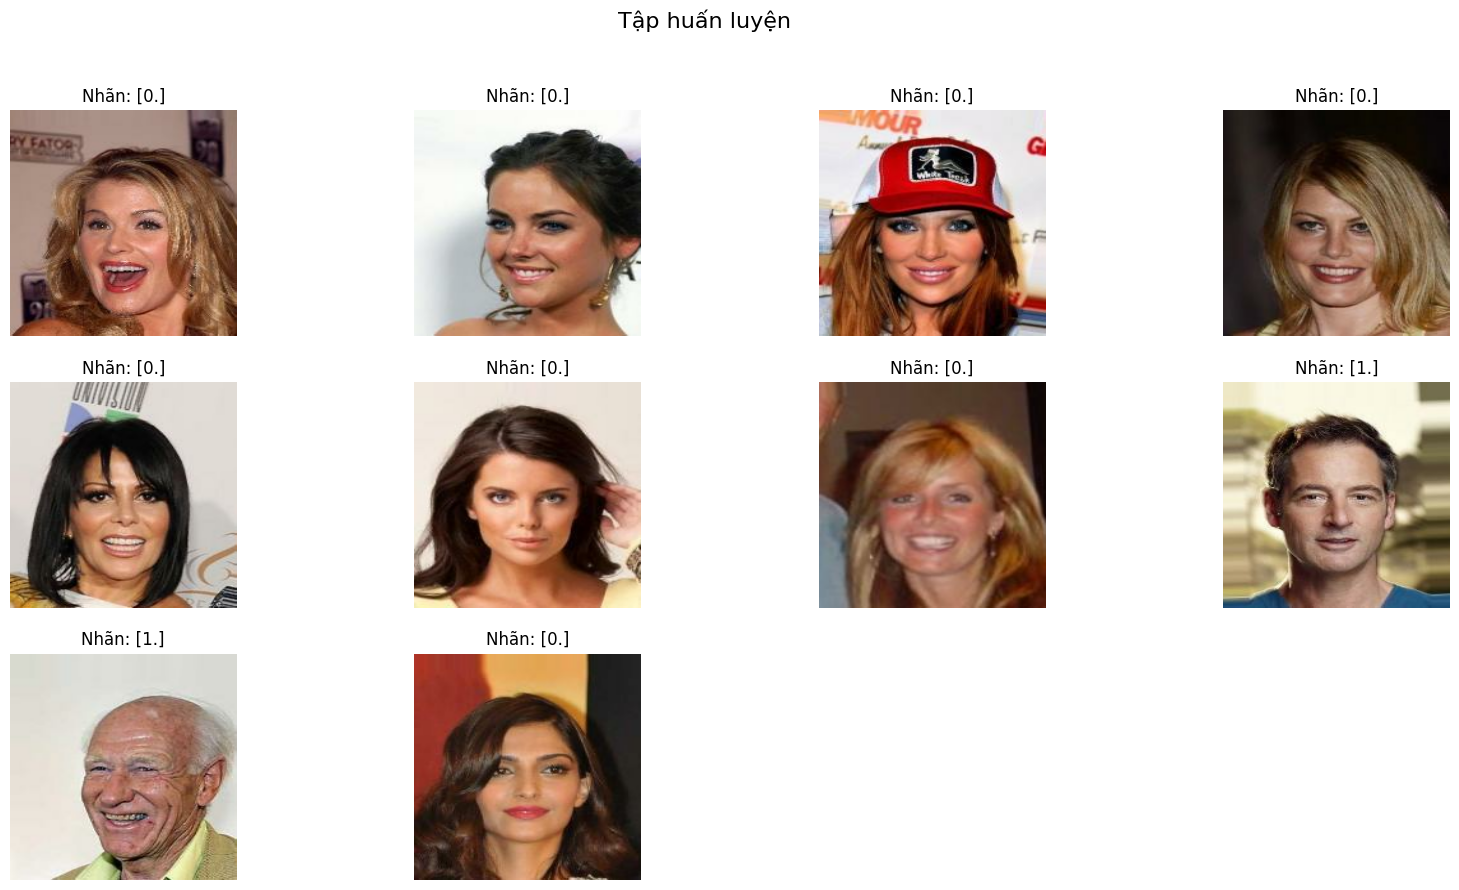


Ảnh kiểm định:


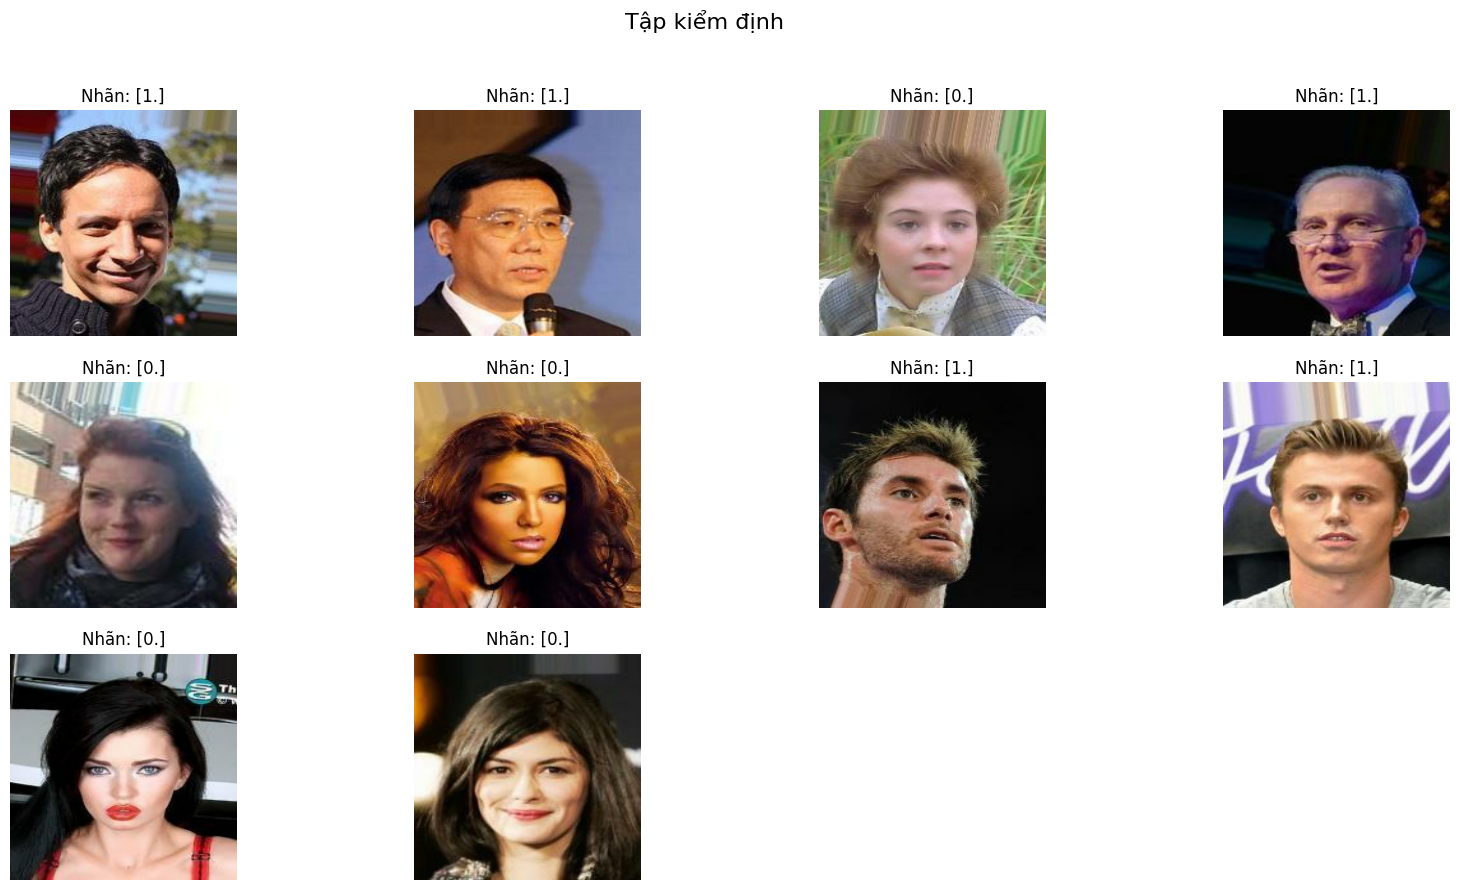


Ảnh kiểm tra:


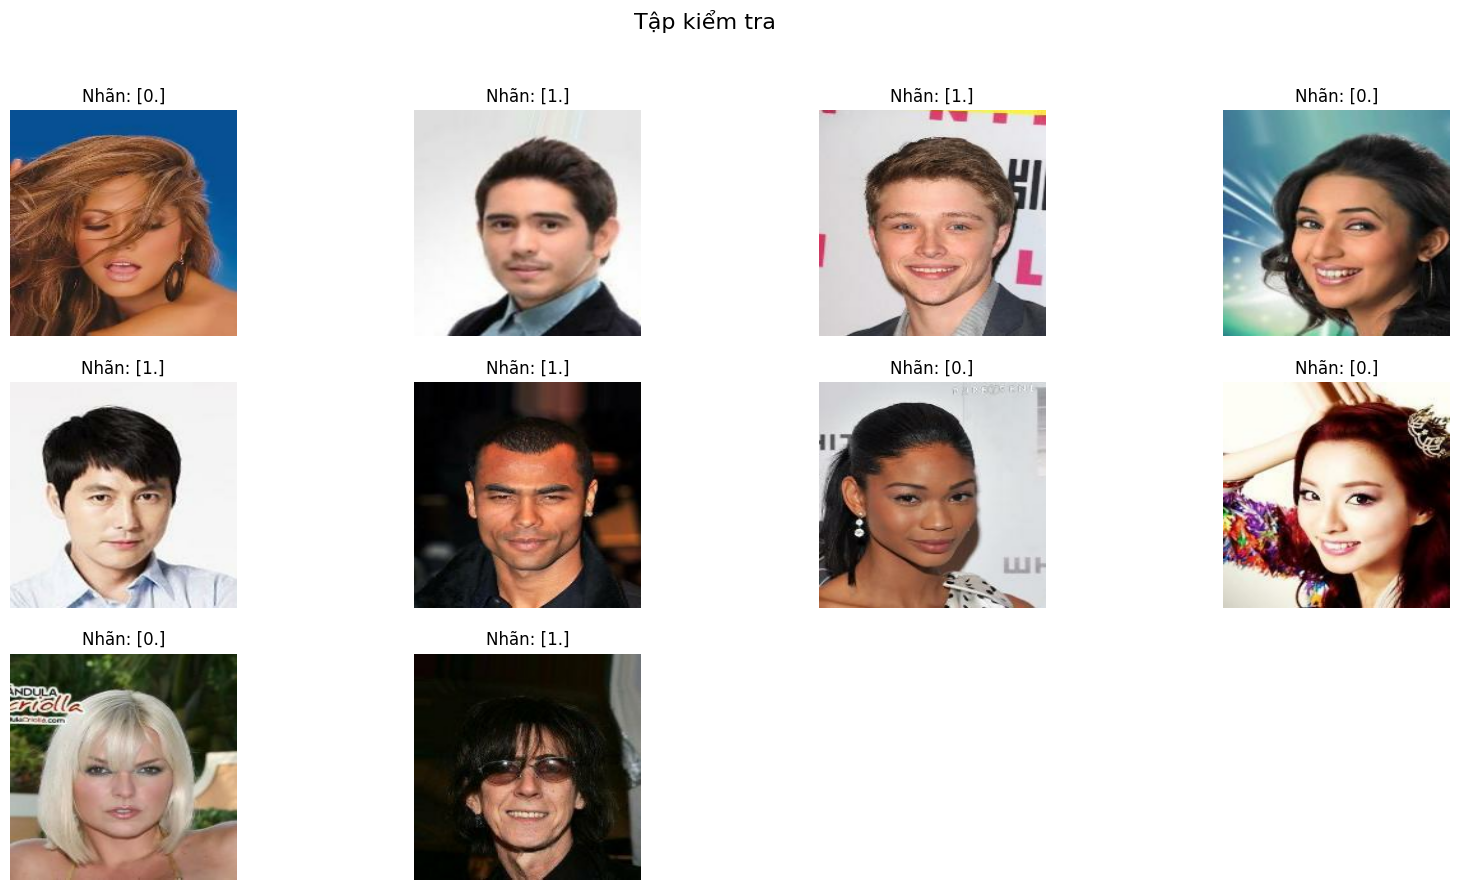

In [3]:
# Hiển thị một số ảnh mẫu
def hien_thi_anh(dataset, so_luong_anh, tieu_de):
    plt.figure(figsize=(20, 10))
    for images, labels in dataset.take(1):
        for i in range(so_luong_anh):
            plt.subplot(3, 4, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(f'Nhãn: {labels[i]}')
            plt.axis('off')
    plt.suptitle(tieu_de, fontsize=16)
    plt.show()

print("Ảnh huấn luyện:")
hien_thi_anh(train_ds, 10, "Tập huấn luyện")

print("\nẢnh kiểm định:")
hien_thi_anh(val_ds, 10, "Tập kiểm định")

print("\nẢnh kiểm tra:")
hien_thi_anh(test_ds, 10, "Tập kiểm tra")


In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Tạo base model MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Đóng băng các lớp của base model
base_model.trainable = False

# Thêm các lớp fully connected
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Tạo model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
)

<ipython-input-4-f8c968bcac55>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 42s 416ms/step - accuracy: 0.5999 - loss: 1.0234 - val_accuracy: 0.7731 - val_loss: 0.4729
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.8020 - loss: 0.4370 - val_accuracy: 0.8033 - val_loss: 0.4191
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - accuracy: 0.8213 - loss: 0.3909 - val_accuracy: 0.8169 - val_loss: 0.3939
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 0.8372 - loss: 0.3675 - val_accuracy: 0.8167 - val_loss: 0.3884
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.8352 - loss: 0.3626 - val_accuracy: 0.8225 - val_loss: 0.3858
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.8447 - loss: 0.3415 - val_accuracy: 0.8136 - val_loss: 0.3966
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.8471 - loss: 0.3410 - val_accuracy: 0.8256 - val_loss: 0.3831
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step

In [5]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 227, 227, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 114, 114, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 114, 114, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 114, 114, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 114, 114, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 114, 114, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 114, 114, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 114, 114, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 114, 114, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 114, 114, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 114, 114, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 114, 114, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 115, 115, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 57, 57, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 6,196,293 (23.64 MB)

 Trainable params: 1,312,769 (5.01 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2,625,540 (10.02 MB)

In [6]:
# Lưu model
model.save('bai12.keras')

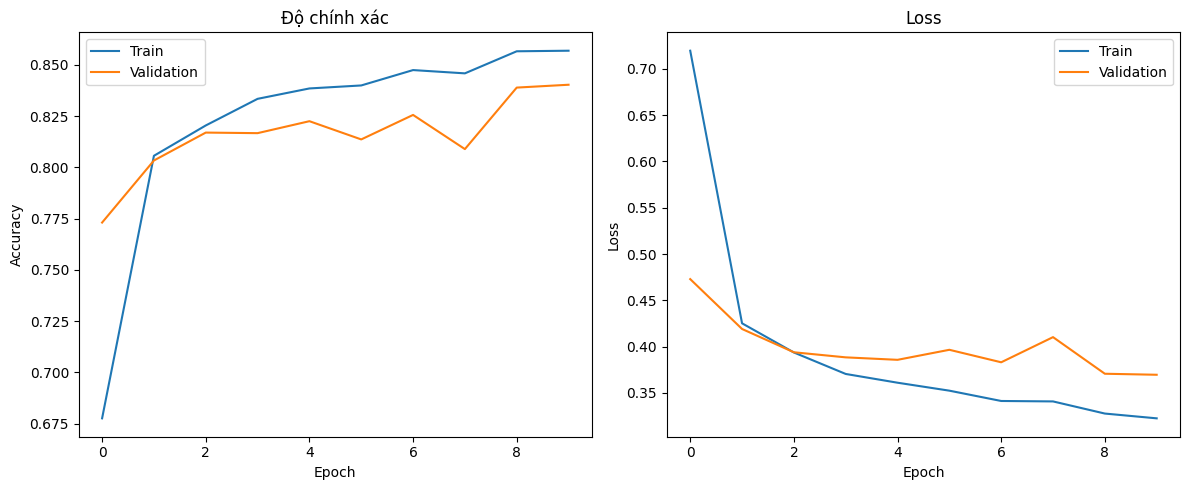

In [7]:
# Vẽ biểu đồ độ chính xác và loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Độ chính xác')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# Đánh giá mô hình trên tập kiểm tra
y_pred_total = []
y_true = []

for img, label in test_ds:
    y_pred = model.predict(img)
    y_pred_total += [1 if i > 0.5 else 0 for i in y_pred]
    y_true += np.array(label).flatten().tolist()

accuracy = accuracy_score(y_true, y_pred_total)
precision = precision_score(y_true, y_pred_total)
recall = recall_score(y_true, y_pred_total)
f1 = f1_score(y_true, y_pred_total)

print(f'Độ chính xác (Accuracy): {accuracy:.4f}')
print(f'Độ chính xác (Precision): {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Điểm F1 (F1-score): {f1:.4f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 470ms/step
Độ chính xác (Accuracy): 0.8362
Độ chính xác (Precision): 0.7963
Recall: 0.8153
Điểm F1 (F1-score): 0.8057
